In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('precision', 2)
pd.options.display.float_format = '{:.9g}'.format

In [3]:
np.random.seed(0)

df = pd.DataFrame({
    'cate1': np.random.randint(low=1, high=5, size=200),
    'cate2': np.random.randint(low=1, high=5, size=200),
    'payment1': np.random.randint(low=1, high=30000, size=200),
    'payment2': np.random.randint(low=1, high=2000, size=200),
    'dummy_ratio':np.random.random(size=200)
})

df.head()

,cate1,cate2,dummy_ratio,payment1,payment2
0,1,2,0.513074863,23239,1867
1,4,3,0.649831974,968,227
2,2,4,0.544590877,4371,1250
3,1,3,0.0324652957,9053,1964
4,4,3,0.580151716,22572,1668


In [4]:
def calc_ratio(numerator_col, denominator_col):
    '''
    関数内容
    ・分母が「0」の場合は倍率を「-1」上記以外は倍率を算出する関数
    
    Input
    ・numerator_col:倍率算出時に分子にしたいカラム
    ・denominator_col:倍率算出時に分母にしたいカラム
    
    関数使用方法
    ・df['ratio'] = df.apply(lambda x: calc_ratio(x['sales_1'], x['sales_2']), axis=1)
    '''
    if denominator_col == 0:
        ratio = -1
    else:
        ratio = round((numerator_col / denominator_col), 0)
    return ratio

In [5]:
df['ratio'] = df.apply(lambda x: calc_ratio(x['payment1'], x['payment2']), axis=1)

df.head()

,cate1,cate2,dummy_ratio,payment1,payment2,ratio
0,1,2,0.513074863,23239,1867,12
1,4,3,0.649831974,968,227,4
2,2,4,0.544590877,4371,1250,3
3,1,3,0.0324652957,9053,1964,5
4,4,3,0.580151716,22572,1668,14


C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


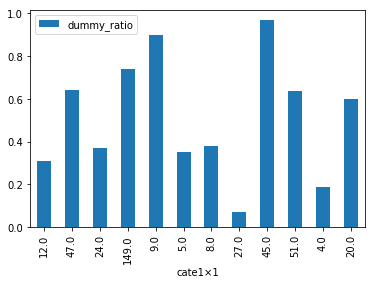

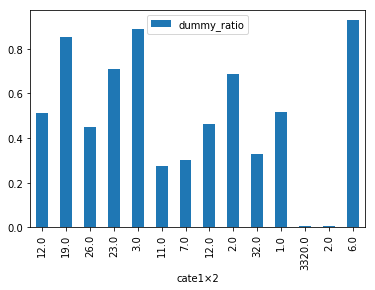

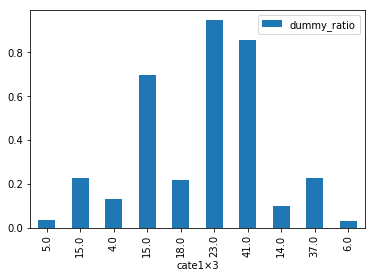

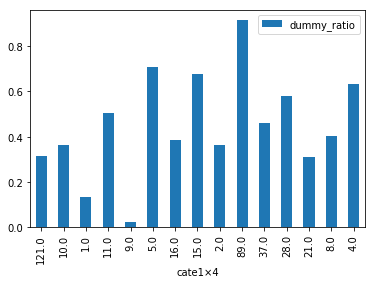

In [6]:
cate_list = list(set(df['cate2'].tolist()))# setを使うことで要素をユニークにできる

# for文で毎回plotし続ければグラフが上書きされることはない
for num in cate_list:
    cate1_df = df[(df['cate1'] == 1)&(df['cate2'] == num)]
    cate1_df2 = cate1_df[['dummy_ratio', 'ratio']].set_index('ratio')
    #plt.figure(figsize=(3,3))# なくても良い
    cate1_df2.plot.bar()
    plt.xlabel('cate1'+ '×' + str(num))